<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/PolinomiosdeLegrendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Utilizando las librerías sympy y scipy de python, realizar lo siguiente:

(a) Graficar en un solo panel los polinomios de Legendre, $P(x)$ para $n = 0 ,..,5$.

Nos apoyamos de que existe una fórmula en scipy para el polinomio de Legendre.

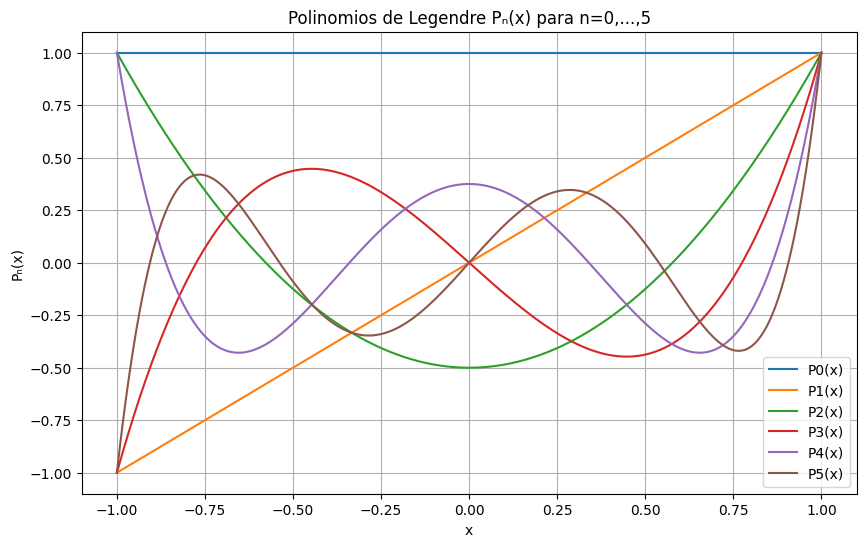

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre

x = np.linspace(-1, 1, 500)

plt.figure(figsize=(10, 6))
for n in range(6):
    Pn = legendre(n)
    plt.plot(x, Pn(x), label=f'P{n}(x)')

plt.title('Polinomios de Legendre Pₙ(x) para n=0,...,5')
plt.xlabel('x')
plt.ylabel('Pₙ(x)')
plt.legend()
plt.grid(True)
plt.show()

(b) Mostrar graficamente que se satisface la relación (hágalo para $n = 3$):

$(1 - x ^ 2) * P_{n}' * (x) =(n+1)xP_{n} (x)-(n+1)P_{n+1} (x)$

Nombramos los dos lados de nuestra ecuación, para poder compararlos y finalmente hacemos la gráfica para comprobar que la relación se satiface.

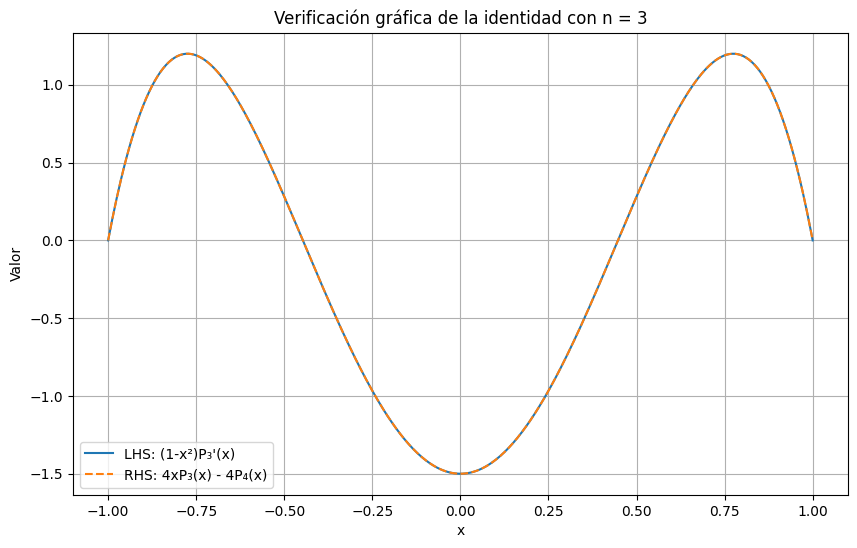

In [5]:
from sympy import symbols, diff, simplify, lambdify, legendre as legendre_sym
import numpy as np
import matplotlib.pyplot as plt

x_sym = symbols('x')
n = 3

P3_sym = legendre_sym(n, x_sym)
P4_sym = legendre_sym(n + 1, x_sym)

P3_deriv = diff(P3_sym, x_sym)

lhs = (1 - x_sym**2) * P3_deriv
rhs = (n + 1) * x_sym * P3_sym - (n + 1) * P4_sym

lhs_func = lambdify(x_sym, lhs, 'numpy')
rhs_func = lambdify(x_sym, rhs, 'numpy')

x_vals = np.linspace(-1, 1, 500)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, lhs_func(x_vals), label='LHS: (1-x²)P₃\'(x)')
plt.plot(x_vals, rhs_func(x_vals), '--', label='RHS: 4xP₃(x) - 4P₄(x)')
plt.title('Gráfica de la identidad con n = 3')
plt.xlabel('x')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


(c) Mostrar algebraicamente que se satisface la relación (hágalo para $n = 3$)

$(1 - x ^ 2) * P_{n}' * (x) =(n+1)xP_{n}(x)-(n+1)P_{n+1}(x)$

Hacemos algo análogo al anterior inciso, nombramos cada uno de los lados de la ecuación para poder comparlos y vemos si la identidad se cumple.

In [24]:
from sympy import symbols, diff, simplify, legendre as legendre_sym, pprint

x = symbols('x')

n = 3

P3 = legendre_sym(n, x)
P4 = legendre_sym(n + 1, x)

P3_deriv = diff(P3, x)

lhs = (1 - x**2) * P3_deriv
rhs = (n + 1) * x * P3 - (n + 1) * P4

print("P3(x):")
pprint(P3)

print("\nP4(x):")
pprint(P4)

print("\nP3'(x):")
pprint(P3_deriv)

print("\nLHS = (1 - x^2) * P3'(x):")
pprint(lhs)

print("\nRHS = 4x * P3(x) - 4 * P4(x):")
pprint(rhs)

print("\nResta (LHS - RHS):")
pprint(lhs - rhs)

print("\n¿Se cumple?:", simplify(lhs - rhs) == 0)


P3(x):
   3      
5⋅x    3⋅x
──── - ───
 2      2 

P4(x):
    4       2    
35⋅x    15⋅x    3
───── - ───── + ─
  8       4     8

P3'(x):
    2    
15⋅x    3
───── - ─
  2     2

LHS = (1 - x^2) * P3'(x):
         ⎛    2    ⎞
⎛     2⎞ ⎜15⋅x    3⎟
⎝1 - x ⎠⋅⎜───── - ─⎟
         ⎝  2     2⎠

RHS = 4x * P3(x) - 4 * P4(x):
      4               ⎛   3      ⎞    
  35⋅x        2       ⎜5⋅x    3⋅x⎟   3
- ───── + 15⋅x  + 4⋅x⋅⎜──── - ───⎟ - ─
    2                 ⎝ 2      2 ⎠   2

Resta (LHS - RHS):
    4               ⎛   3      ⎞            ⎛    2    ⎞    
35⋅x        2       ⎜5⋅x    3⋅x⎟   ⎛     2⎞ ⎜15⋅x    3⎟   3
───── - 15⋅x  - 4⋅x⋅⎜──── - ───⎟ + ⎝1 - x ⎠⋅⎜───── - ─⎟ + ─
  2                 ⎝ 2      2 ⎠            ⎝  2     2⎠   2

¿Se cumple?: True


(d) Mostrar algebraicamente que se satisface la relación (hágalo para $n = 3$)


$(n + 1) P_{n+1} (x)-(2n+1)xP_{n}(x)+nP_{n-1} (x)=0$, $n = 0, 1, 2, ...$

Hacemos algo análogo al anterior inciso, nombramos cada uno de los lados de la ecuación para poder comparlos y vemos si la identidad se cumple para $n=0,1,2,3$.

In [23]:
from sympy import symbols, simplify, legendre as legendre_sym, pprint

x = symbols('x')

print("=== Verifiquemos la relación de recurrencia de Legendre ===")
for n in range(4):
    print(f"\n➡️ Verificando para n = {n}")

    P_n_minus_1 = legendre_sym(n - 1, x) if n > 0 else 0
    P_n = legendre_sym(n, x)
    P_n_plus_1 = legendre_sym(n + 1, x)

    expr = (n + 1) * P_n_plus_1 - (2 * n + 1) * x * P_n + n * P_n_minus_1

    print("\nP_{n-1}(x):")
    pprint(P_n_minus_1)
    print("P_n(x):")
    pprint(P_n)
    print("P_{n+1}(x):")
    pprint(P_n_plus_1)

    print("\nExpresión completa:")
    pprint(expr)

    resultado = simplify(expr)

    print("\nSimplificando la expresión:")
    pprint(resultado)

    print("¿Se cumple?:", resultado == 0)


=== Verifiquemos la relación de recurrencia de Legendre ===

➡️ Verificando para n = 0

P_{n-1}(x):
0
P_n(x):
1
P_{n+1}(x):
x

Expresión completa:
0

Simplificando la expresión:
0
¿Se cumple?: True

➡️ Verificando para n = 1

P_{n-1}(x):
1
P_n(x):
x
P_{n+1}(x):
   2    
3⋅x    1
──── - ─
 2     2

Expresión completa:
0

Simplificando la expresión:
0
¿Se cumple?: True

➡️ Verificando para n = 2

P_{n-1}(x):
x
P_n(x):
   2    
3⋅x    1
──── - ─
 2     2
P_{n+1}(x):
   3      
5⋅x    3⋅x
──── - ───
 2      2 

Expresión completa:
    3       ⎛   2    ⎞      
15⋅x        ⎜3⋅x    1⎟   5⋅x
───── - 5⋅x⋅⎜──── - ─⎟ - ───
  2         ⎝ 2     2⎠    2 

Simplificando la expresión:
0
¿Se cumple?: True

➡️ Verificando para n = 3

P_{n-1}(x):
   2    
3⋅x    1
──── - ─
 2     2
P_n(x):
   3      
5⋅x    3⋅x
──── - ───
 2      2 
P_{n+1}(x):
    4       2    
35⋅x    15⋅x    3
───── - ───── + ─
  8       4     8

Expresión completa:
    4       2       ⎛   3      ⎞
35⋅x    21⋅x        ⎜5⋅x    3⋅x⎟
───

(e) Muestre que se cumple la fórmula de Rodrigues, ejemplificando para $n = 0, 1 ,..,5$:

$P_{n}(x) = 1/(2 ^ n * n!) * (d ^ n)/(d * x ^ n) * (x ^ 2 - 1) ^ n$, $n = 0, 1, 2$

Hacemos algo análogo al anterior inciso, nombramos cada uno de los lados de la ecuación para poder comparlos y vemos si la identidad se cumple para $n=0,1,2,3,4,5$.

In [25]:
from sympy import symbols, diff, simplify, factorial, legendre as legendre_sym, pprint

x = symbols('x')

print("=== Verifiquemos de la fórmula para Pₙ(x) ===")
for n in range(6):
    print(f"\n➡️  n = {n}")

    Pn_directo = legendre_sym(n, x)

    f = (x**2 - 1)**n
    derivada = diff(f, x, n)
    rodrigues = derivada / (2**n * factorial(n))

    print("\nPolinomio Pn(x):")
    pprint(Pn_directo)

    print("\nResultado de la fórmula:")
    pprint(rodrigues)

    diferencia = simplify(Pn_directo - rodrigues)

    print("\nDiferencia (Pn - Resultado de la fórmula):")
    pprint(diferencia)

    print("¿Se cumple?:", diferencia == 0)

=== Verifiquemos de la fórmula para Pₙ(x) ===

➡️  n = 0

Polinomio Pn(x):
1

Resultado de la fórmula:
1

Diferencia (Pn - Resultado de la fórmula):
0
¿Se cumple?: True

➡️  n = 1

Polinomio Pn(x):
x

Resultado de la fórmula:
x

Diferencia (Pn - Resultado de la fórmula):
0
¿Se cumple?: True

➡️  n = 2

Polinomio Pn(x):
   2    
3⋅x    1
──── - ─
 2     2

Resultado de la fórmula:
   2    
3⋅x  - 1
────────
   2    

Diferencia (Pn - Resultado de la fórmula):
0
¿Se cumple?: True

➡️  n = 3

Polinomio Pn(x):
   3      
5⋅x    3⋅x
──── - ───
 2      2 

Resultado de la fórmula:
  ⎛   2    ⎞
x⋅⎝5⋅x  - 3⎠
────────────
     2      

Diferencia (Pn - Resultado de la fórmula):
0
¿Se cumple?: True

➡️  n = 4

Polinomio Pn(x):
    4       2    
35⋅x    15⋅x    3
───── - ───── + ─
  8       4     8

Resultado de la fórmula:
                                  2
   4       2 ⎛ 2    ⎞     ⎛ 2    ⎞ 
8⋅x  + 24⋅x ⋅⎝x  - 1⎠ + 3⋅⎝x  - 1⎠ 
───────────────────────────────────
                 8             